In [4]:
# Generic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 21.7MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [136]:
!pip install seaborn

In [203]:
!pip install xgboost

    100% |████████████████████████████████| 142.8MB 350kB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install category_encoders
!pip install geocoder

    100% |████████████████████████████████| 92kB 4.0MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 102kB 3.2MB/s a 0:00:011
    100% |████████████████████████████████| 829kB 22.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
!gunzip listings.csv.gz 

gzip: listings.csv.gz: No such file or directory


In [5]:
df_listing = pd.read_csv('la_listings.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_listing.shape

(43954, 106)

In [7]:
pd.set_option('display.max_columns', None)  # Unlimited columns
pd.set_option('display.max_rows', None)  # Unlimited rows

In [8]:
df_listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                4
summary                                          1698
space                                           11319
description                                       954
experiences_offered                                 0
neighborhood_overview                           14977
notes                                           21588
transit                                         16853
access                                          16670
interaction                                     16005
house_rules                                     13286
thumbnail_url                                   43954
medium_url                                      43954
picture_url                                         0
xl_picture_url              

In [9]:
df_listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
22685,4239896,https://www.airbnb.com/rooms/4239896,20190505154550,2019-05-06,"Peaceful, laid back Hollywood Hills retreat",Our lovely Hollywood Hills home is tucked away...,It's a peaceful spot that feels like you're li...,Our lovely Hollywood Hills home is tucked away...,none,It's central to a bunch of cool areas - Holly...,NaN,"No - you'll need a car, but that's LA for you!",You can access my entire home with the excepti...,I work a lot of hours but when I'm home I'm a ...,I expect guests to have a great time and to be...,NaN,NaN,https://a0.muscache.com/im/pictures/53248837/c...,NaN,5075884,https://www.airbnb.com/users/show/5075884,Bec,2013-02-13,"Los Angeles, California, United States",I'm an Australian and live in LA. I'm in film ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/5075884/profi...,https://a0.muscache.com/im/users/5075884/profi...,Cahuenga Pass,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Los Angeles, CA, United States",Cahuenga Pass,Hollywood Hills,NaN,Los Angeles,CA,90068,Los Angeles,"Los Angeles, CA",US,United States,34.11972,-118.34510,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$175.00,$450.00,"$1,650.00",NaN,NaN,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,4 months ago,t,0,0,30,119,2019-05-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,"{""City of Los Angeles"","" CA""}",t,f,flexible,f,f,2,1,1,0,NaN
39031,12826454,https://www.airbnb.com/rooms/12826454,20190505154550,2019-05-06,Private Contemporary with Panoramic Views!!!,Perfectly Located!!! This contemporary 3 bed/ ...,"Plenty of light amazing energy , watching the ...",Perfectly Located!!! This contemporary 3 bed/ ...,none,"Spectacular views, quiet, safe and great stree...",Pets Allowed!,"Recommend renting a car or using Uber, but gre...","Entire home, backyard, fountain-Pool (great fo...",Every few days to make sure everything is A-OK,"Children are welcome, but must have supervisio...",NaN,NaN,https://a0.muscache.com/im/pictures/a13cb850-0...,NaN,52773540,https://www.airbnb.com/users/show/52773540,Fariba,2015-12-30,"Los Angeles, California, United States",Professional and Knowledgeable. Aims to Please.,within an hour,100%,NaN,t,https://a0.muscache.com/im/pic

In [10]:
# Dropping columns which are either.
# 1. Difficult to parse. (NLP)
# 2. Not much variance.
# 3. To many NaN values
# 4. Carries no valuable information.

columns = ['listing_url',
           'scrape_id',
           'last_scraped',
           'name',
           'summary',
           'space',
           'description',
           'experiences_offered',
           'neighborhood_overview',
           'notes',
           'transit',
           'access',
           'interaction',
           'house_rules',
           'thumbnail_url',
           'medium_url',
           'picture_url',
           'xl_picture_url',
           'host_id',
           'host_url',
           'host_name',
           'host_location',
           'host_about',
           'host_acceptance_rate',
           'host_thumbnail_url',
           'host_picture_url',
           'host_neighbourhood',
           'host_listings_count',
           'host_verifications',
           'street',
           'neighbourhood',
           'neighbourhood_cleansed',
           'neighbourhood_group_cleansed',
           'city',
           'state',
           'market',
           'smart_location',
           'country_code',
           'country',
           'calendar_last_scraped',
           'license',
           'jurisdiction_names',
           'square_feet',
           'weekly_price',
           'monthly_price']

df_listing.drop(columns=columns, inplace=True)

In [11]:
df_listing.security_deposit.head()

0    $1,000.00
1      $400.00
2      $100.00
3          NaN
4        $0.00
Name: security_deposit, dtype: object

In [12]:
import geocoder
from time import sleep

def get_zipcode_from_latlng(lat, lng):
  
  # Update MapBox API key
  MAPBOX_ACCESS_TOKEN="pk.eyJ1IjoidGZveDE5OTMiLCJhIjoiY2p4Y2htNGwxMDNocDNzbWt3a3o3aHBnZCJ9.zKfqq6BHvhpKlnDk94-_XA"
  
  latlng = [lat, lng]
  g = geocoder.mapbox(latlng, key=MAPBOX_ACCESS_TOKEN, method='reverse')
  sleep(1)
  
  if not g.ok:
    return np.nan
  
  print(f"{lat},{lng},{g.json['postal']}")
  
  return g.json['postal']

def fetch_zipcode(row):
  if isinstance(row['zipcode'], float) and np.isnan(row['zipcode']):
    return get_zipcode_from_latlng(row['latitude'], row['longitude'])

  return row['zipcode']

def cleanup_zipcode(col):
  clean_up = {
      'Near 91304': '91304',
      '90014-3002': '90014',
      '90028\n\n90017': '90028',
      '91744-3228': '91744',
      '90039-2715': '90039',
      'CA91780': '91780',
      'CA91748': '91748',
      '91001-2243': '91001',
      '139 S Valencia Ave, Glendora. 91741': '91741',
      'CA 91765': '91765',
      '90005-3747': '90005',
      '90036-2514': '90036',
      '0': np.nan,
      '900': np.nan,
      '91606-1412': '91606',
      90.0: np.nan
  }
  
  if col in clean_up:
    return clean_up[col]
  
  if isinstance(col, str):
    return col
  
  if np.isnan(col):
    return col
  
  return str(col).split(".")[0]

In [13]:
# Clean up zipcodes
#df_listing['zipcode'] = \
#    df_listing['zipcode'].apply(cleanup_zipcode)

# Update missing zipcodesw
#df_listing['zipcode'] = \
# df_listing.apply(fetch_zipcode, axis=1)

# Export the csv file to avoid invoking of MapBox API repeatedly
#df_listing.to_csv('listings_with_zipcode.csv', index = False, header=True)

#df_listing['zipcode'].nunique()


In [14]:
# Re-init df_listing
df_listing = pd.read_csv('listings_with_zipcode.csv')

In [15]:
def cleanup_hostresponserate(col):
  if isinstance(col, float):
    return 0.0
  
  return int(col.replace('%',''))

def cleanup_securitydeposit(col):
  if isinstance(col, float):
    return 0.0
  
  return float(col.replace('$','').replace(',',''))

def cleanup_cleaningfee(col):
  if isinstance(col, float):
    return 0.0
  
  return float(col.replace('$','').replace(',',''))

In [16]:
# Clean up procedure to removew NaNs

# Fill NaNs as unknown which shall be Label Encoded later
df_listing.host_response_time.fillna(value='unknown', inplace=True)

# Drop rows with NaN for following columns
df_listing.host_since.dropna(inplace=True)
df_listing.dropna(subset=['host_since', 
                  'host_is_superhost', 
                  'host_total_listings_count', 
                  'host_has_profile_pic', 
                  'host_identity_verified',
                  'bathrooms',
                  'bedrooms',
                  'beds'], inplace=True)

# Drop columns which shall not be used for modeling
columns = ['first_review',
           'last_review']

df_listing.drop(columns=columns, inplace=True)

# Convert response rate to float. Here replacing NaN with 0.
df_listing['host_response_rate'] = \
    df_listing['host_response_rate'].apply(cleanup_hostresponserate)

# Convert security deposit to float. Here replacing NaN with 0.
df_listing['security_deposit'] = \
    df_listing['security_deposit'].apply(cleanup_securitydeposit)

# Convert cleaning fee to float. Here replacing NaN with 0.
df_listing['cleaning_fee'] = \
    df_listing['cleaning_fee'].apply(cleanup_cleaningfee)

# Update the missing rewiew score values with median value.
review_columns = ['review_scores_rating',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value']

for column in review_columns:
  median = df_listing[column].median()
  df_listing[column] = \
    df_listing[column].apply(lambda x: median if np.isnan(x) else x)

# Update the missing rewiew per month values with mean value .
mean = df_listing['reviews_per_month'].mean()
df_listing['reviews_per_month'] = \
    df_listing['reviews_per_month'].apply(lambda x: mean if np.isnan(x) else x)

In [17]:
df_listing.isnull().sum()

id                                              0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
zipcode                                         2
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
bed_type                                        0
amenities                                       0


In [18]:
# Feature Engineering
import category_encoders as ce
from datetime import datetime

In [19]:
# Derive the number of days since hosting from host since.
# Then to avoid colinearity drop host since.
today = datetime.today()

df_listing['host_since'] = pd.to_datetime(df_listing['host_since'])
df_listing['host_since_in_days'] = \
   df_listing['host_since'].apply(lambda x: (today - x).days)

df_listing.drop(columns=['host_since'], inplace=True)

# Update to numerical form
df_listing['host_is_superhost'] = \
   df_listing['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df_listing['host_has_profile_pic'] = \
   df_listing['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
df_listing['host_identity_verified'] = \
   df_listing['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
df_listing['is_location_exact'] = \
   df_listing['is_location_exact'].apply(lambda x: 1 if x == 't' else 0)


# Updating the property type to lis only top 10
v = df_listing['property_type'].value_counts() <= 366

df_listing.loc[df_listing['property_type'].isin(v.index[v]), \
               'property_type'] = 'Other'

# Get the total number of listed amenities. Here all amenities are 
# considered to be of same weightable but this is not true mostly.
df_listing['amenities_count'] = \
   df_listing['amenities'].apply(lambda x: len(x.split(",")))

df_listing.drop(columns=['amenities'], inplace=True)

 #Convert price to float
df_listing['price'] = \
   df_listing['price'].apply(lambda x: 
                               float(x.replace('$','').replace(',','')))

# Planning to use adjusted price form calendar. So drop this price.
#df_listing.drop(columns=['price'], inplace=True)

# Convert extra people cost to float
df_listing['extra_people'] = \
    df_listing['extra_people'].apply(lambda x: \
                                     float(x.replace('$','').replace(',','')))

# Group the updates into days, weeks, months, years and never.
calendar_updated = {'today': 'days',
'2 weeks ago': 'weeks',
'a week ago': 'weeks',
'yesterday': 'days',
'3 weeks ago': 'weeks',
'2 months ago': 'months',
'3 days ago': 'days',
'4 days ago': 'days',
'4 weeks ago': 'weeks',
'3 months ago': 'months',
'5 days ago': 'days',
'5 weeks ago': 'months',
'2 days ago': 'days',
'4 months ago': 'months',
'6 weeks ago': 'months',
'5 months ago': 'months',
'6 months ago': 'months',
'6 days ago': 'days',
'9 months ago': 'months',
'7 weeks ago': 'months',
'7 months ago': 'months',
'10 months ago': 'months',
'8 months ago': 'months',
'11 months ago': 'months',
'1 week ago': 'weeks',
'15 months ago': 'years',
'14 months ago': 'years',
'12 months ago': 'years',
'16 months ago': 'years',
'17 months ago': 'years',
'13 months ago': 'years',
'23 months ago': 'years',
'22 months ago': 'years',
'21 months ago': 'years',
'18 months ago': 'years',
'20 months ago': 'years',
'19 months ago': 'years',
'24 months ago': 'years',
'35 months ago': 'years',
'34 months ago': 'years',
'26 months ago': 'years',
'25 months ago': 'years',
'33 months ago': 'years',
'30 months ago': 'years',
'never': 'never',
'28 months ago': 'years',
'27 months ago': 'years',
'29 months ago': 'years',
'36 months ago': 'years',
'31 months ago': 'years',
'41 months ago': 'years',
'37 months ago': 'years',
'39 months ago': 'years',
'42 months ago': 'years',
'32 months ago': 'years',
'38 months ago': 'years',
'46 months ago': 'years',
'40 months ago': 'years',
'44 months ago': 'years',
'45 months ago': 'years',
'43 months ago': 'years',
'47 months ago': 'years',
'48 months ago': 'years',
'49 months ago': 'years',
'53 months ago': 'years',
'51 months ago': 'years',
'57 months ago': 'years',
'54 months ago': 'years',
'52 months ago': 'years',
'50 months ago': 'years',
'56 months ago': 'years',
'59 months ago': 'years',
'61 months ago': 'years',
'55 months ago': 'years',
'60 months ago': 'years',
'58 months ago': 'years',
'87 months ago': 'years',
'62 months ago': 'years',
'65 months ago': 'years',
'72 months ago': 'years',
'70 months ago': 'years'}

df_listing['calendar_updated'] = \
    df_listing['calendar_updated'].apply(lambda x: calendar_updated[x])

#  0 variance to dropping it.
df_listing.drop(columns=['has_availability'], inplace=True)

# Update to numerical form
df_listing['requires_license'] = \
   df_listing['requires_license'].apply(lambda x: 1 if x == 't' else 0)
df_listing['instant_bookable'] = \
   df_listing['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

#  0 variance to dropping it.
df_listing.drop(columns=['is_business_travel_ready'], inplace=True)

# Update to numerical form
df_listing['require_guest_profile_picture'] = \
   df_listing['require_guest_profile_picture'].apply(lambda x: 1 if x == 't' else 0)
df_listing['require_guest_phone_verification'] = \
   df_listing['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)


In [20]:
df_listing['price'].head()

0     105.0
1     145.0
2      75.0
3    5000.0
4     120.0
Name: price, dtype: float64

In [21]:
df_listing.require_guest_phone_verification.value_counts()

0    42808
1     1077
Name: require_guest_phone_verification, dtype: int64

In [22]:
df_target = df_listing['price']
df_target = df_listing['price'].replace(0, np.median(df_listing['price']))
df_target.shape

(43885,)

In [23]:
df_features = df_listing
df_features['price'].replace(0, np.median(df_listing['price']))
df_features.shape
#df for exploring visuals, as it includes price
df_visuals = df_features

In [24]:
df_features = df_features.drop(['price'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35108, 56), (35108,), (8777, 56), (8777,))

In [27]:
def log_transform(y_train, y_test):
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    return y_train, y_test

In [28]:
y_train, y_test = log_transform(y_train, y_test)
y_train.shape, y_test.shape

((35108,), (8777,))

In [29]:
def encode(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train = encode.fit_transform(X_train)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_test 

In [30]:
X_train, X_test = encode(X_train, X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35108, 56), (8777, 56), (35108,), (8777,))

In [31]:
X_train.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_in_days,amenities_count
1953,18362450,1,100.0,1,4.0,1,1,90068.0,34.10828,-118.32893,0,1,1,4,1.0,1.0,2.0,1,100.0,25.0,1,0.0,1,1125,1,1,1125,1125,1.0,1125.0,1,5,19,47,71,225,112,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,4,4,0,0,9.110000,1767,28
27660,2564649,2,0.0,0,2.0,1,1,90069.0,34.08504,-118.38671,1,1,1,4,1.0,1.0,1.0,1,300.0,125.0,2,0.0,5,16,5,5,16,16,5.0,16.0,2,0,0,0,0,8,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,2,2,0,0,0.140000,2316,24
32920,23381766,2,0.0,0,1.0,1,1,91706.0,34.08216,-117.97790,0,1,2,2,1.5,1.0,1.0,1,100.0,20.0,1,0.0,7,1125,7,7,1125,1125,7.0,1125.0,3,0,0,0,0,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,2,0,0,1,0,0,1,1.889684,1277,18
35167,2105792,2,0.0,0,1.0,1,1,90048.0,34.07553,-118.36792,1,1,1,2,1.0,1.0,1.0,1,0.0,60.0,1,0.0,4,21,4,4,21,21,4.0,21.0,3,0,0,0,0,8,0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,0,0,1,1,0,0,0.130000,2015,13
32685,27288642,2,0.0,0,1.0,1,0,90014.0,34.04511,-118.25225,1,2,1,2,1.0,0.0,1.0,1,0.0,45.0,1,0.0,2,3,2,2,3,3,2.0,3.0,2,0,0,0,0,6,6,97.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,2,0,0,1,1,0,0,0.780000,335,19


In [32]:
X_train['zipcode'] = X_train['zipcode'].replace(np.nan, np.mean(df_listing['zipcode']))
X_test['zipcode'] = X_test['zipcode'].replace(np.nan, np.mean(df_listing['zipcode']))

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35108, 56), (8777, 56), (35108,), (8777,))

In [34]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
model = RandomForestRegressor(max_depth = None, n_estimators=50, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
#reasonable score given the low MAE value below
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)

0.801790731781251


In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

rmse = (mean_squared_error(y_test, y_pred))**(1/2)
mae, rmse

(0.2527453855459131, 0.37261016203782604)

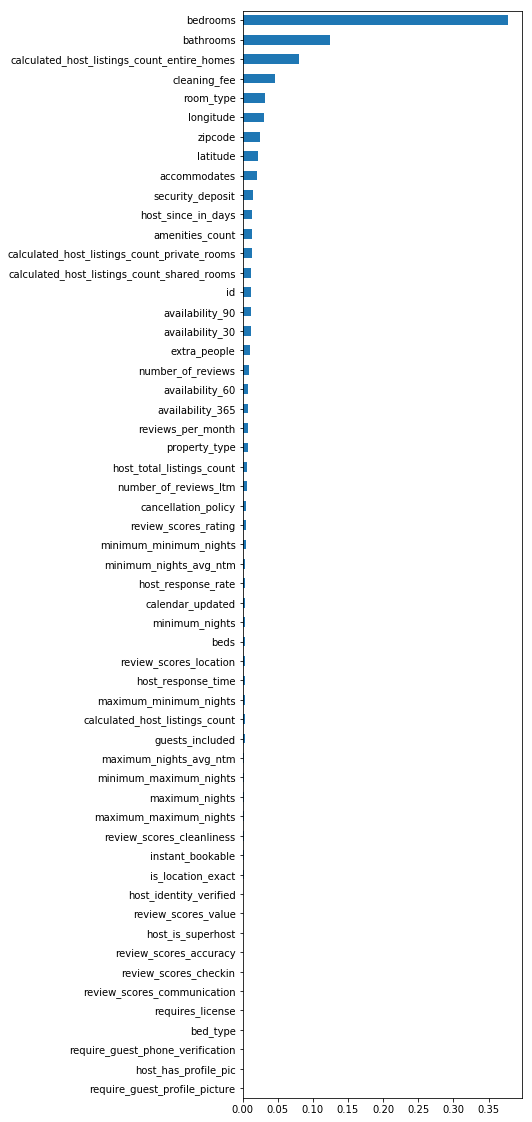

In [37]:
figsize=(5, 20)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()

In [38]:
features = ['bedrooms', 'bathrooms', 'room_type', 'cleaning_fee',
            'zipcode', 'accommodates','security_deposit',
            'amenities_count', 'host_since_in_days']
X_train2 = X_train[features]
X_test2 = X_test[features]


In [39]:
model = RandomForestRegressor(max_depth = None, n_estimators=200, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train2, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [40]:
#reasonable score given the low MAE value below
print(model.score(X_test2, y_test))

0.7657732146471461


In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

rmse = (mean_squared_error(y_test, y_pred))**(1/2)
mae, rmse

(0.2527453855459131, 0.37261016203782604)

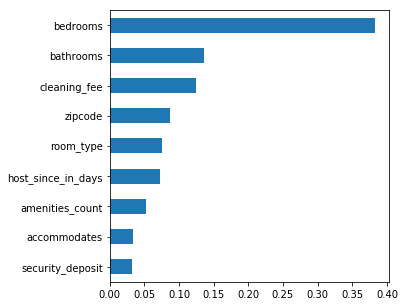

In [43]:
figsize=(5, 5)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_, X_train2.columns).sort_values()
importances.plot.barh()

In [44]:
from xgboost import XGBRegressor

In [45]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, 
                   n_estimators=100, verbosity=1, n_jobs=-1, 
                   random_state=42)

In [46]:
xgb.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [47]:
xgb.score(X_test, y_test)

0.7927191234185116

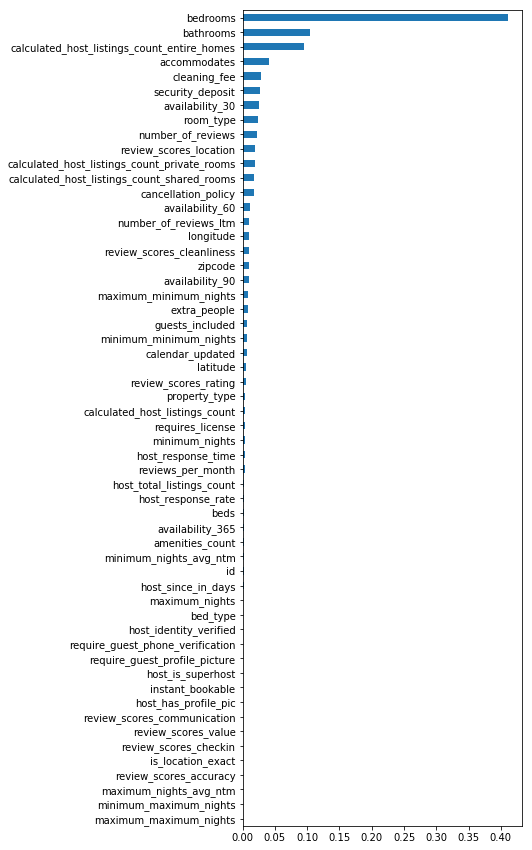

In [48]:
figsize=(5, 15)
plt.figure(figsize=figsize)
importances = pd.Series(xgb.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()

In [49]:
features = ['bedrooms', 'room_type', 'bathrooms', 'security_deposit',
           'accommodates', 'cleaning_fee', 'review_scores_location',
           'availability_30', 'calculated_host_listings_count_shared_rooms']
           
X_train3 = X_train[features]
X_test3 = X_test[features]

In [50]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, 
                   n_estimators=100, verbosity=1, n_jobs=-1, 
                   random_state=42)

In [51]:
xgb.fit(X_train3, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [52]:
xgb.score(X_test3, y_test)

0.7369728092753254

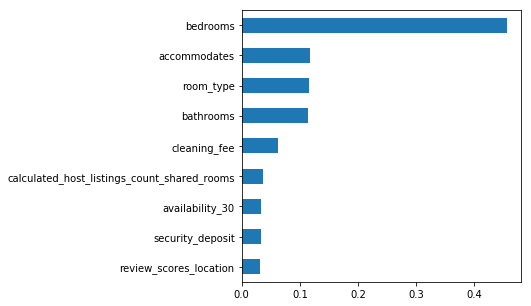

In [53]:
figsize=(5, 5)
plt.figure(figsize=figsize)
importances = pd.Series(xgb.feature_importances_, X_test3.columns).sort_values()
importances.plot.barh()

In [54]:
df_listing.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_in_days,amenities_count
0,20862235,within an hour,100.0,0,29.0,1,0,90402.0,34.02658,-118.50118,1,Apartment,Entire home/apt,2,1.0,0.0,2.0,Real Bed,105.0,1000.0,120.0,2,10.0,31,1125,31,31,1125,1125,31.0,1125.0,weeks,3,33,63,338,6,4,100.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,29,29,0,0,0.330000,1231,18
1,26165453,within an hour,100.0,1,1.0,1,0,90291.0,34.02066,-118.48708,1,Other,Entire home/apt,2,1.0,1.0,1.0,Real Bed,145.0,400.0,125.0,2,0.0,3,1123,3,60,1123,1123,21.1,1123.0,days,4,12,12,192,14,14,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,strict_14_with_grace_period,0,0,1,1,0,0,1.400000,1295,40
2,23371066,within a few hours,100.0,1,2.0,1,1,90403.0,34.03328,-118.48544,1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.0,100.0,45.0,1,0.0,3,8,3,3,8,8,3.0,8.0,weeks,10,32,57,57,22,16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,strict_14_with_grace_period,0,0,1,0,1,0,1.560000,3425,20
3,29922373,within a day,100.0,0,1.0,1,0,90272.0,34.04060,-118.54477,1,Villa,Entire home/apt,8,6.0,5.0,5.0,Real Bed,5000.0,0.0,0.0,1,0.0,7,1125,7,7,1125,1125,7.0,1125.0,months,27,57,87,177,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,flexible,0,0,1,1,0,0,1.889684,2907,18
4,20541717,within an hour,100.0,0,1.0,1,0,90401.0,34.01752,-118.49219,1,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,120.0,0.0,65.0,2,50.0,1,1125,1,2,1125,1125,1.3,1125.0,days,2,7,25,42,110,70,93.0,10.0,9.0,10.0,10.0,10.0,9.0,1,1,strict_14_with_grace_period,0,0,1,1,0,0,6.060000,677,15


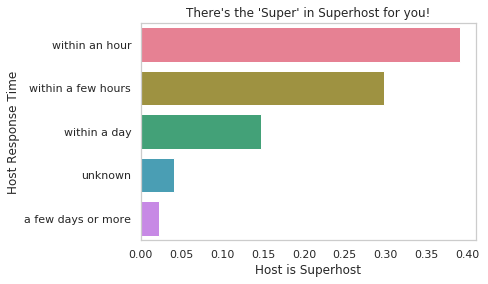

In [369]:
sns.barplot(x='host_is_superhost', y='host_response_time', data=df_listing,
            palette = sns.color_palette("husl", 5), ci=None)

plt.xlabel('Host is Superhost')
plt.ylabel('Host Response Time')

plt.title("There's the 'Super' in Superhost for you!");

<Figure size 360x360 with 0 Axes>

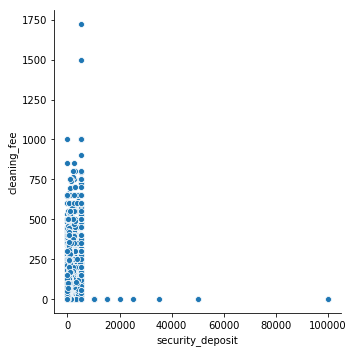

In [58]:
figsize=(5, 5)
plt.figure(figsize=figsize)
sns.relplot(x='security_deposit', y='cleaning_fee', data=df_listing)

In [ ]:
['1-28', '29-56', '57-84', '85-112']

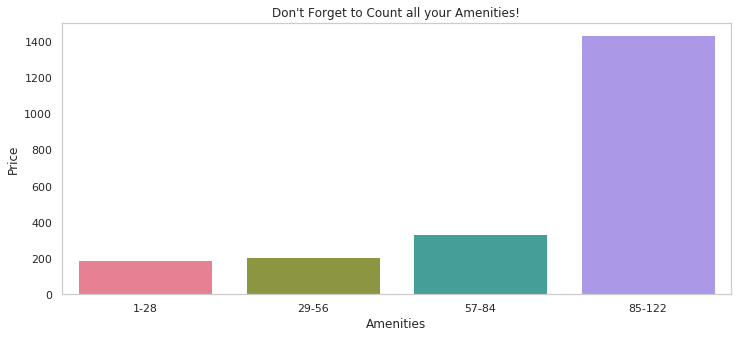

In [362]:
df_visuals['Amenities'] = pd.cut(df_visuals['amenities_count'], 4)
type(df_visuals['amenities_bucket'])

figsize=(12, 5)
fig = plt.figure(figsize=figsize)
sns.barplot(x='Amenities', y='price', data=df_visuals, ci=None,
           palette = sns.color_palette("husl", 4))


plt.xlabel('Amenities')
plt.ylabel('Price')

plt.title("Don't Forget to Count all your Amenities!")
plt.xticks([0, 1, 2, 3], ['1-28', '29-56', '57-84', '85-122']);

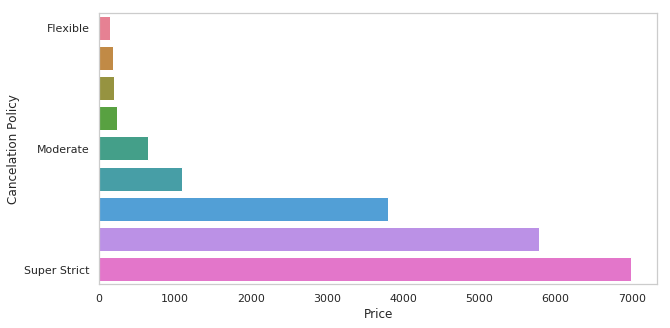

In [357]:
figsize=(10, 5)
plt.figure(figsize=figsize)

sns.barplot(x='price', y='cancellation_policy', data=df_visuals, ci=None,
            palette = sns.color_palette("husl", 9),  
            order=['moderate','flexible','strict','strict_14_with_grace_period',
                   'super_strict_30','super_strict_60','luxury_super_strict_95',
                   'luxury_moderate','luxury_no_refund'])

plt.xlabel('Price')
plt.ylabel('Cancelation Policy')

plt.title('Ca)
plt.yticks([0, 4, 8], ['Flexible', 'Moderate', 'Super Strict']);

In [ ]:
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15])

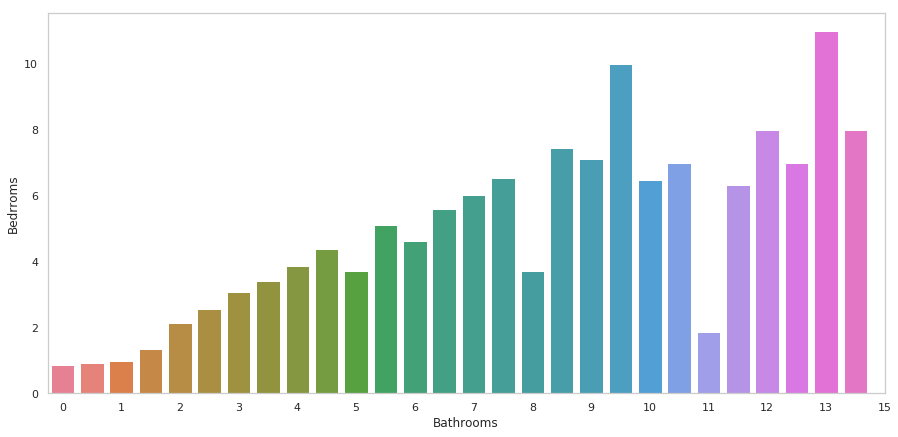

In [350]:
figsize=(15, 7)
plt.figure(figsize=figsize)
sns.barplot(x='bathrooms', y='bedrooms', data=df_visuals, ci=None, 
           palette = sns.color_palette("husl", 30))

plt.xlabel('Bathrooms')
plt.ylabel('Bedrroms')

plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]);

Text(0.5, 1.0, 'Make Sure to Have a Great Bed!')

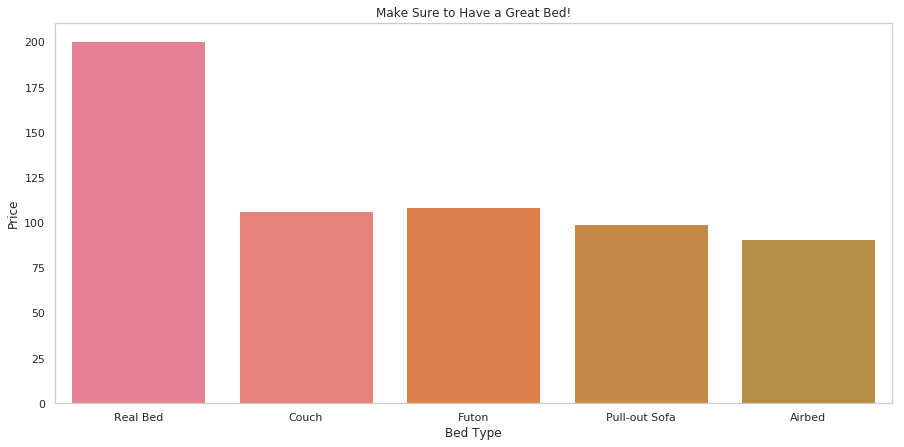

In [348]:
figsize=(15, 7)
plt.figure(figsize=figsize)
sns.barplot(x='bed_type', y='price', data=df_visuals, ci=None, 
           palette = sns.color_palette("husl", 30))

plt.xlabel('Bed Type')
plt.ylabel('Price');

plt.title('Make Sure to Have a Great Bed!')

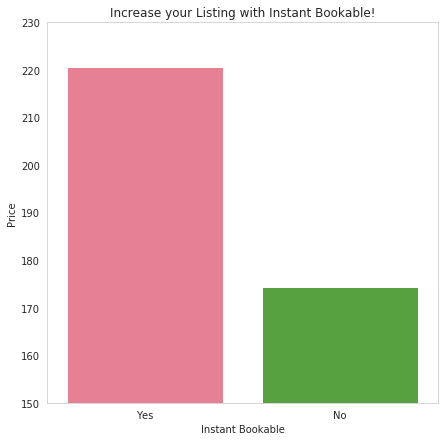

In [68]:
figsize=(7, 7)
plt.figure(figsize=figsize)
sns.barplot(x='instant_bookable', y='price', data=df_visuals, ci=None, 
           palette = sns.color_palette("husl", 3))

plt.ylim(150, 230)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Increase your Listing with Instant Bookable!');
plt.xlabel('Instant Bookable')
plt.ylabel('Price')


plt.xticks([0, 1], ['Yes', 'No']);

(100, 200)

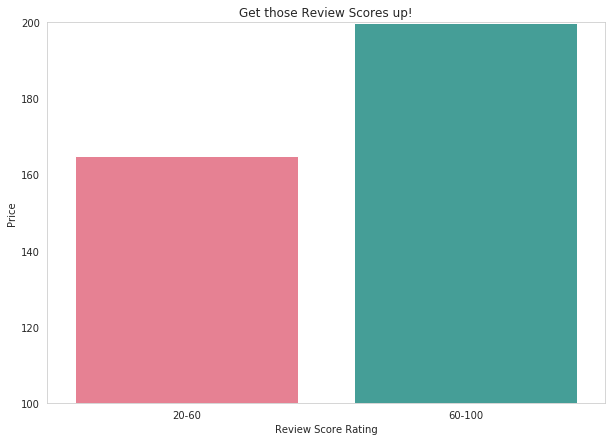

In [62]:
df_visuals['Review Scores Rating'] = pd.cut(df_visuals['review_scores_rating'], 2)

figsize=(10, 7)
plt.figure(figsize=figsize)
sns.barplot(x='Review Scores Rating', y='price', data=df_visuals, ci=None, 
           palette = sns.color_palette("husl", 2))

#plt.ylim(150, 230)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Get those Review Scores up!');
plt.xlabel('Review Score Rating')
plt.ylabel('Price')


plt.xticks([0, 1], ['20-60', '60-100']);
plt.ylim(100, 200)